In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('Soil fertility prediction.csv')
df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [11]:
df['Output'] = df['Output'].replace(2, 1)

In [ ]:
#Replacing the vlaue 2 with 1 to make it binary classification since there are very few instances of 2
df['Output'].value_counts(0)

Output
1    479
0    401
Name: count, dtype: int64

In [ ]:
#Checking for high multi-collinearity
df.corr()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
N,1.000000,-0.010049,0.050616,0.075138,-0.005646,0.029887,-0.124959,0.054240,0.076108,-0.183832,0.105870,-0.170835,0.729125
P,-0.010049,1.000000,0.086964,0.004857,0.006082,-0.008996,-0.100204,-0.016912,0.141165,0.054689,0.045265,-0.097401,0.188180
K,0.050616,0.086964,1.000000,0.002661,-0.109726,-0.029005,0.026489,-0.002511,-0.053442,-0.005597,0.021157,0.108025,0.060434
pH,0.075138,0.004857,0.002661,1.000000,0.058217,-0.015926,0.013164,-0.008321,-0.032685,-0.000223,-0.008488,0.010115,0.061680
EC,-0.005646,0.006082,-0.109726,0.058217,1.000000,-0.007045,0.051810,-0.035703,-0.041525,0.035638,-0.043662,-0.004469,-0.019714
OC,0.029887,-0.008996,-0.029005,-0.015926,-0.007045,1.000000,0.046813,0.625683,0.282128,-0.009703,-0.078540,0.106760,0.037464
S,-0.124959,-0.100204,0.026489,0.013164,0.051810,0.046813,1.000000,-0.013870,-0.208752,0.158130,-0.226249,0.478017,-0.046898
Zn,0.054240,-0.016912,-0.002511,-0.008321,-0.035703,0.625683,-0.013870,1.000000,0.548485,-0.051229,-0.065154,0.056252,0.041543
Fe,0.076108,0.141165,-0.053442,-0.032685,-0.041525,0.282128,-0.208752,0.548485,1.000000,0.138121,0.275564,-0.332181,0.052399
Cu,-0.183832,0.054689,-0.005597,-0.000223,0.035638,-0.009703,0.158130,-0.051229,0.138121,1.000000,0.079934,0.101115,-0.119174


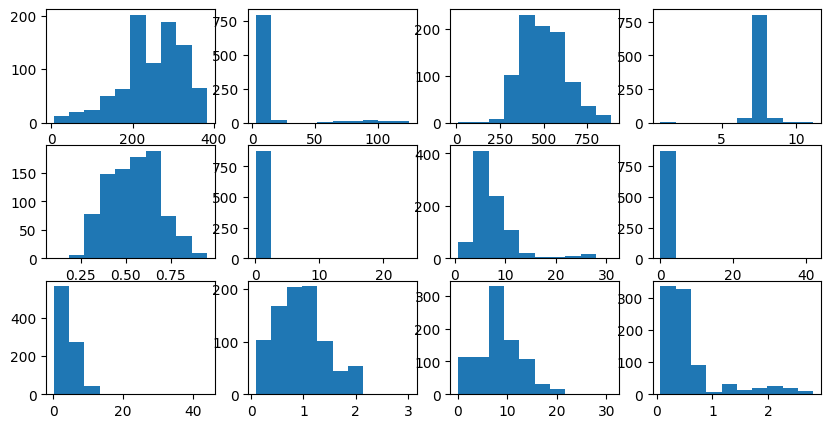

In [ ]:
# Checking the skewness of the data to best choose the scaling technique
plt.figure(figsize=(10, 5))

plt.subplot(3,4,1)
plt.hist(df['N'])

plt.subplot(3,4,2)
plt.hist(df['P'])

plt.subplot(3,4,3)
plt.hist(df['K'])

plt.subplot(3,4,4)
plt.hist(df['pH'])

plt.subplot(3,4,5)
plt.hist(df['EC'])

plt.subplot(3,4,6)
plt.hist(df['OC'])

plt.subplot(3,4,7)
plt.hist(df['S'])

plt.subplot(3,4,8)
plt.hist(df['Zn'])

plt.subplot(3,4,9)
plt.hist(df['Fe'])

plt.subplot(3,4,10)
plt.hist(df['Cu'])

plt.subplot(3,4,11)
plt.hist(df['Mn'])

plt.subplot(3,4,12)
plt.hist(df['B'])
plt.show()

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X = df.drop(columns=['Output'])
y = df['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.8977272727272727


In [36]:
x_cv = scaler.fit_transform(X)
cv_accuracy = cross_val_score(model, x_cv, y, cv=5, scoring="accuracy")
print("LogisticRegression CV accuracy mean:", cv_accuracy.mean())

LogisticRegression CV accuracy mean: 0.9
